#### Step_0 setting up libraries and dataset


In [46]:
import pandas as pd
import sklearn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [3]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
red.mean()


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [6]:
# setting up X and Y and scalling

X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)


In [7]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### 1.1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.


In [53]:
km1 = KMeans(n_clusters=6, n_init=20)
km1_fitted = km1.fit(X)

In [54]:
X['cluster'] = km1_fitted.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.115202,0.008936,0.117813,0.441080,-0.001987,1.171672,1.389735,0.310863,-0.113237,-0.177215,-0.570162,-0.450003
1,-1.030384,0.344437,-0.888731,-0.227053,-0.392483,0.261269,-0.170254,-1.225881,1.093982,-0.123079,1.081196,0.467075
2,1.644453,-0.529115,1.198662,0.277865,0.048860,-0.437464,-0.397779,1.243584,-0.976705,0.244305,-0.141837,0.099127
3,0.296666,-1.003243,0.781866,-0.124279,-0.236751,-0.353522,-0.534716,-0.495682,-0.296306,0.462643,0.990827,1.031898
4,-0.418365,0.641015,-0.742496,-0.218301,-0.043634,-0.452219,-0.349207,0.020411,0.307477,-0.418710,-0.550844,-0.516940
5,0.065322,0.010313,1.104160,-0.408285,5.523137,-0.086857,0.500700,0.180551,-1.674547,3.624492,-0.888281,-0.374932


### 1.2. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

### 2.1. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.
### Describe variables that cluster with higher values of wine quality. 

In [ ]:
row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.show()

### 2.2. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [47]:
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[-1.88268914,  1.05348584],
       [-1.1714591 ,  2.01407348],
       [-1.0510703 ,  1.35186267],
       ...,
       [-1.3765937 , -0.58952052],
       [-2.4175747 ,  0.54265175],
       [-0.28704654, -1.22192968]])

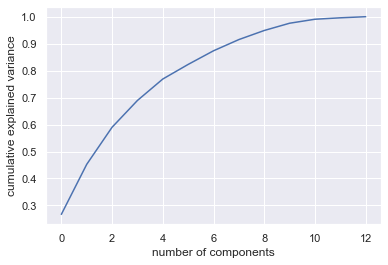

In [52]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [37]:
print(pca.components_) 

[[ 4.76114755e-01 -2.77910342e-01  4.70690513e-01  1.26822762e-01
   1.82818366e-01 -5.54487254e-02 -1.48092833e-02  3.41902351e-01
  -4.17028044e-01  2.55821213e-01 -4.17628272e-02  1.33976990e-01
   2.13968481e-01]
 [ 3.42980053e-02  3.16551734e-01 -1.00641426e-01  1.76556287e-01
   2.03065154e-01  2.49885410e-01  3.59262669e-01  3.58181537e-01
  -9.98595868e-02 -9.03020869e-02 -5.06302695e-01 -4.59725395e-01
  -1.02272736e-01]
 [-1.68155904e-01 -2.22756206e-01  9.61161401e-02  2.43643385e-01
  -2.63880670e-02  6.18353230e-01  5.43075313e-01 -1.69006601e-01
   7.24889912e-02  2.10526509e-01  2.22032791e-01  2.18724014e-01
   1.53935328e-02]
 [-2.32186899e-01  4.33089894e-02 -5.81151352e-02 -3.83222607e-01
   6.54634265e-01 -3.32454810e-02 -2.81202410e-02 -2.00972117e-01
  -4.34205136e-03  5.59517941e-01 -9.23964473e-02 -3.83350077e-02
   7.67863237e-03]
 [-7.87006877e-02  2.99271273e-01 -1.20052270e-01  7.09368028e-01
   2.66265643e-01 -1.59458148e-01 -2.18476151e-01  2.08818403e-01


In [38]:
print(pca.explained_variance_)

[3.26586853 2.27021336 1.68441528 1.21585615 0.97387315 0.66305054]


that how much they explain 

In [48]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 13)
transformed shape: (1599, 2)


In [39]:
pca.explained_variance_ratio_

array([0.26683042, 0.18548266, 0.13762135, 0.09933878, 0.07956811,
       0.05417305])

ValueError: x and y must have same first dimension, but have shapes (6,) and (2,)

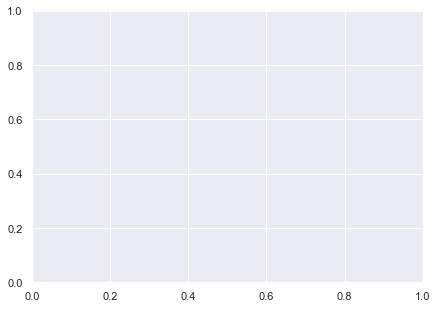

In [49]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2); #this is part of the homework 

In [50]:
np.sum(pca.explained_variance_ratio_)

0.4523130793311305

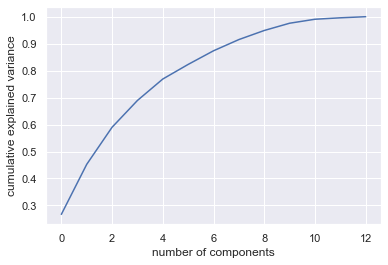

In [51]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');